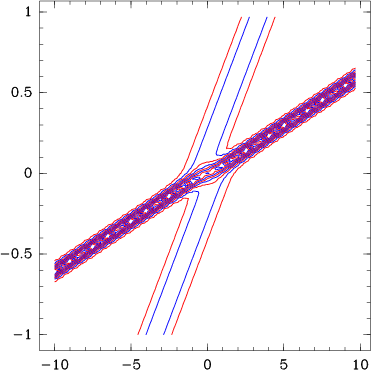

In [1]:
import biggles
import numpy

#
# Create example 2-dimensional data set of two solitons colliding.
#
n = 64
x = numpy.arange(-10., 10., 20. / n)
t = numpy.arange(-1., 1., 2. / n)
z = numpy.zeros((len(x), len(t)))

for i in range(len(x)):
    for j in range(len(t)):
        z[i, j] = -12. * (3. + 4. * numpy.cosh(2. * x[i] - 8. * t[j])
                          + numpy.cosh(4. * x[i] - 64. * t[j])) / \
            (3. * numpy.cosh(x[i] - 28. * t[j])
             + numpy.cosh(3. * x[i] - 36. * t[j]))**2

#
# Make contour component.
#
c = biggles.Contours(z, x, t, color="red")

#
# For fine-grained color control, the Contours component allows you to
# specify a function which returns the color applied to each contour line.
# The arguments passed to the function are:
#
#       i       integer index of contour (0,..,n-1)
#       n       total number of contours
#       z0      z value of contour
#       z_min   minimum z contour value
#       z_max   maximum z contour value
#
# The function should return a valid color, or None for the default.
#
# Here we show how to set every other contour to blue. The remaining
# contours are drawn with the default color, defined above to be red.
#


def even_blue(i, n, z0, z_min, z_max):
    if i % 2 == 0:
        return 0x0000ff
    return None

c.func_color = even_blue

#
# Similarly, Contours accepts similar functions for line type (.func_linestyle)
# and width (.func_linewidth). The arguments passed are the same.
#

#
# Make framed plot container and add contour component.
#
p = biggles.FramedPlot()
p.add(c)
p